# FRECUENCIA FUNDAMENTAL

 La voz puede caracterizarse por varios parámetros. El <b>TONO</b> de la voz es una de las características principales, pero en el campo de las tecnologías acústicas, el nombre correcto de este parámetro es la <b>frecuencia fundamental</b>.
 
 La frecuencia fundamental está directamente <b>relacionada</b> con lo que llamamos <b>entonación</b>. Y la entonación, por ejemplo, está asociada con características expresivas de la voz. 

### F0 = La frecuencia fundamental

Frecuencia de vibración de los ligamentos al pronunciar sonidos sonoros.
En sonidos sordos como por ejemplo: susurrar o silbar, los ligamentos no vibran, por lo tanto esta característica no es relevante.

### Variabilidad de la frecuencia fundamental

Puede variar por genero, discurso emocional, etc.

- Voces masculinas, el menor promedio esta entre 70–200 Hz
- Voces femeninas, pueden alcanzar los 400Hz

### Campos de aplicación del F0

1. Emotion Recognition
2. Sex determination (male/female voices)
3. Speaker deterioration, or splitting the speech into phrases
4. In healthcare, detection of the pathological characteristics of the voice.

<b>Nota: </b> Utilizando los parámetros acústicos de Jitter y Shimmer): F0 podría utilizarse para la detección de signos de la enfermedad de <b>Parkinson</b>. Estos parametros también puede utilizarse para el reconocimiento de emociones.

### ilusión auditiva de Laurel y Yanny

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/YOUTUBE_VIDEO_ID_HERE/0.jpg)](https://www.youtube.com/watch?v=yDiXQl7grPQ)

La percepción de F0, que está influenciada por muchos factores: la edad del oyente, el grado de cansancio del oyente, la calidad del sistema de audio

# F0 métodos de estimación

Se dividen en tres categorías

1. Basados en dinámica temporal de la señal o dominio de tiempo (<b>Time-domain</b>)
2. Basados en la estructura de la frecuencia o dominio de la frecuencia (<b>Frequency-domain</b>)
3. Métodos híbridos (<b>Hybrid</b>)

### Etapas de los métodos de estimación
1. Preprocesamiento (filtrado de la señal, división en ventanas)
2. Buscando posibles valores para F0 (candidatos)
3. Seguimiento: la elección de la trayectoria F0 más probable (lo cual es importante ya que en cada momento tenemos varios candidatos compitiendo simultáneamente)

## 1. Time-domain

Antes de aplicar los métodos del dominio del tiempo, la señal se filtra para dejar sólo las frecuencias bajas. 

##### Consideraciones

- Se establecen los umbrales: frecuencias mínimas y máximas, por ejemplo, de 75 a 500 Hz. 
- La estimación de F0 sólo se realiza para el discurso armónico.
- Las secciones con pausas o manchas de ruido pueden alterar los neighboring frames y conducir a errores cuando se aplica la interpolación o el suavizado. 
- La longitud del frame se elige de manera que comprenda al menos tres intervalos

### Autocorrelations

Principal algoritmo,

- Se calcula la función de autocorrelación y luego se define su primer máximo que reflejará la componente de frecuencia más destacada de la señal.

El problema de este algoritmo es que el primer máximo no siempre puede corresponder a la frecuencia deseada. En condiciones casi perfectas en grabaciones de alta calidad, el algoritmo es propenso a errores debido a la compleja estructura de la señal. En las condiciones cercanas a la realidad, el número de errores aumenta drásticamente. Además, en las grabaciones de baja calidad inicial y ruidosas se puede presentar la ausencia del pico deseado.

A pesar de los errores es ampliamente utilizado en muchos algoritmos, incluyendo el YIN. El nombre en sí mismo se refiere a la idea del equilibrio entre la conveniencia y la inexactitud de la autocorrelación: "El nombre YIN de ''yin'' y ''yang'' de la filosofía oriental alude a la interacción entre la autocorrelación y la cancelación que implica".

The creators of YIN tried to fix the problem. The first thing they changed was the use of Cumulative Mean Normalized Difference function that was supposed to lower the sensitivity of the signal to the amplitude modulations and make the peaks more apparent.

<img src="https://miro.medium.com/max/806/1*13edEhKas4F3VyuUu4a7jg.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

YIN tries to avoid the mistakes that come up when the length of the window function is not exactly divisible into the fluctuation period. For that matter, parabolic interpolation to approximate the minimum is applied. At the last step of the audio signal processing Best Local Estimate function is used to avoid rapid fluctuation of the values. (Whether it is good or bad — it is hard to tell.)

## 2. Frequency-domain

Cuando hablamos del dominio de la frecuencia, el aspecto más prominente parece ser la estructura armónica de la señal. En otras palabras, los picos espectrales en la frecuencia que son divisible en F0. Se puede convertir este patrón periódico en un pico obvio con la ayuda del análisis cepstrum. Cepstrum es una transformada de Fourier (FFT) del logaritmo del espectro de potencia estimado. El pico del cepstrum corresponde a la componente más periódica del espectro.
https://pdfs.semanticscholar.org/5dc0/f86273c58d4d05b01882b197facf58b1ab1a.pdf

A History of Cepstrum Analysis and its Application to Mechanical Problems
https://surveillance7.sciencesconf.org/conference/surveillance7/01_a_history_of_cepstrum_analysis_and_its_application_to_mechanical_problems.pdf

## 3. Hybrid

### YAAPT
Algorithm of Pitch Tracking

Se clasifica como híbrido ya que utiliza datos temporales y de frecuencia. [Mas info](http://www.ws.binghamton.edu/zahorian/pdf/icslp2006_pitch_v16.pdf)	


### Etapas

1. Preprocesamiento: los valores de la señal inicial se cuadran para obtener una segunda versión de la señal
2. Se amplificar y restaurar los picos "atascados" de autocorrelación, usando la función de diferencia normalizada media acumulada de YIN.
3. Ambas versiones de la señal(version original y la generada en el paso 1) se filtran, generalmente en el espectro de 50–1500 Hz, o 50–900 Hz.
4. Basado en el espectro de la señal transformada, se calcula la trayectoria básica de F0. Los candidatos a F0 se determinan con la función de Correlación de Armónicos Espectrales (SHC).

<img src="https://miro.medium.com/max/812/1*dqn-LRCthMh9OTNOOc04XA.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />
     
      where S(t,f) is a magnitude spectrum of the frame t and frequency f, WL is the length of a window in Hz, NH is the number of harmonics (the authors of the article suggest using the first three harmonics).

5. La definición de los cuadros de voz se hace en base al espectro de potencia también. Luego buscamos la trayectoria más óptima, teniendo en cuenta la posibilidad de doblar el tono o reducirlo a la mitad.

6. Tanto para las señales iniciales como para las transformadas, los candidatos a F0 se determinan con Correlación Cruzada Normalizada (NCCF), en lugar de autocorrelación. usando la siguiente formula:

<img src="https://miro.medium.com/max/1218/1*YRkNvYJoWcrapF6swn4KqA.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />


8. Evaluar a todos los posibles candidatos y calcular su peso. El peso de los candidatos depende no sólo del pico de amplitud de la FNCA, sino también de su proximidad a la trayectoria F0 que fue determinada por el espectro. Por lo tanto, el dominio de la frecuencia se considera bastante contundente todavía y estable.

9. Para todos los pares de candidatos restantes se calcula la matriz del Costo de Transición - el costo de la transición que permite encontrar la mejor trayectoria posible.

## Implementation

 Usamos las librerias: <b>aubio</b> y <b>AMFM_descomposition</b> usadas para hacer pitch-tracking.
 
 - AMFM_decomposition usa el algoritmo YAAPT
 - Aubio usa el algoritmo YIN por defecto
 

In [34]:
#! pip install amfm_decompy
#! pip install aubio
#! pip install source
#! pip install pitch

In [68]:
import amfm_decompy.basic_tools as basic
import amfm_decompy.pYAAPT as pYAAPT
import matplotlib.pyplot as plt
import numpy as np
import aubio
#import sys from aubio
from aubio import source, pitch 

In [69]:
def Fundamental_F(pitch,PATH):
    signal = basic.SignalObj(PATH)
    filename = PATH

    # YAAPT pitches
    pitchY = pYAAPT.yaapt(signal, frame_length=40, tda_frame_length=40, f0_min=75, f0_max=600)

    # YIN pitches
    downsample = 1
    samplerate = 0
    win_s = 1764 // downsample # fft size
    hop_s = 441 // downsample # hop size
    s = source(filename, samplerate, hop_s)
    samplerate = s.samplerate
    tolerance = 0.8
    pitch_o = pitch("yin", win_s, hop_s, samplerate)
    pitch_o.set_unit("midi")
    pitch_o.set_tolerance(tolerance)
    pitchesYIN = []
    confidences = [] 
    total_frames = 0
    while True:
         samples, read = s()
         pitch = pitch_o(samples)[0]
         pitch = int(round(pitch))
         confidence = pitch_o.get_confidence()
         pitchesYIN += [pitch]
         confidences += [confidence]
         total_frames += read
         if read < hop_s:
             break          

    # load PRAAT pitches
    #praat = np.genfromtxt('/home/eva/Documents/papers/habr/PraatPitch.txt', filling_values=0)
    #praat = praat[:,1]
    # plot
    #fig, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(12, 8))

    fig, (ax1,ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12, 8))
    ax1.plot(np.asarray(pitchesYIN), label='YIN', color='green')
    ax1.legend(loc="upper right")
    ax2.plot(pitchY.samp_values, label='YAAPT', color='blue')
    ax2.legend(loc="upper right")
    #ax3.plot(praat, label='Praat', color='red')
    #ax3.legend(loc="upper right") plt.show()

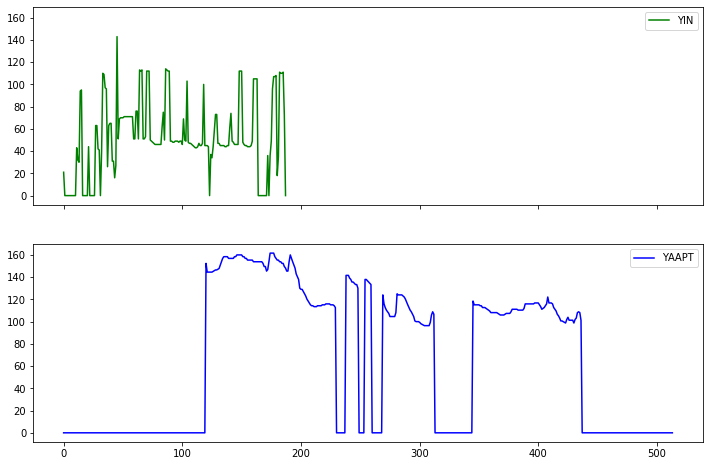

In [72]:

# load audio 

#CARLOS
PATH = './Resources/Audios_test/Carlos/C_SAME.wav'

Fundamental_F(pitch,PATH)




## LEO

/home/josearangos/anaconda3/lib/python3.7/site-packages/amfm_decompy/pYAAPT.py:974: RuntimeWarning: invalid value encountered in true_divide
  phi[lag_min:lag_max] = formula_nume/np.sqrt(formula_denom)
/home/josearangos/anaconda3/lib/python3.7/site-packages/amfm_decompy/pYAAPT.py:1002: RuntimeWarning: invalid value encountered in greater
  phi[lag_min+center-1:lag_max-center])
/home/josearangos/anaconda3/lib/python3.7/site-packages/amfm_decompy/pYAAPT.py:1004: RuntimeWarning: invalid value encountered in greater
  phi[lag_min+center+1:lag_max-center+2])
/home/josearangos/anaconda3/lib/python3.7/site-packages/amfm_decompy/pYAAPT.py:1005: RuntimeWarning: invalid value encountered in greater
  above_thresh = phi[lag_min+center:lag_max-center+1] > merit_thresh1


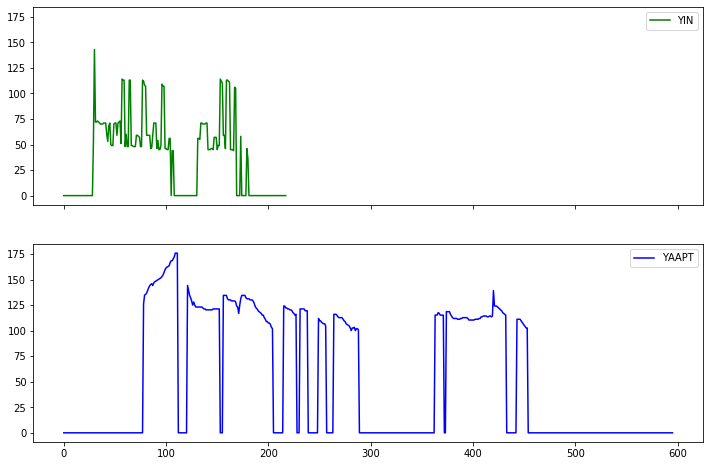

In [73]:
# load audio 
#LEO
PATH_L = './Resources/Audios_test/leo/L_SAME.wav'

Fundamental_F(pitch,PATH_L)

Blog guía:  https://medium.com/@neurodatalab/pitch-tracking-or-how-to-estimate-the-fundamental-frequency-in-speech-on-the-examples-of-praat-fe0ca50f61fd